In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns


### 训练集和验证集数据分布

- 分析每个种类的数量分布

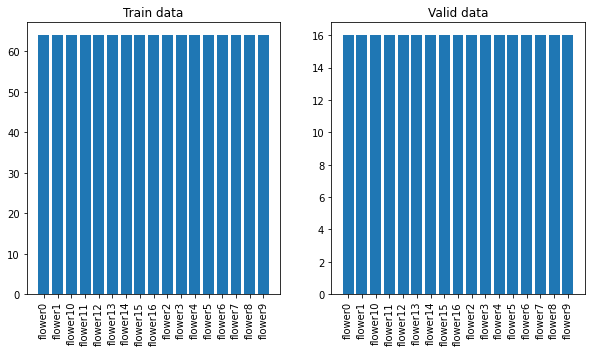

In [2]:
def get_data_num(path='./data/train/'):
    data_dict = {}
    classes_list = os.listdir(path)
    for i in range(len(classes_list)):
        num = len(os.listdir(path+'/'+classes_list[i]))
        data_dict[classes_list[i]] = num
    return data_dict
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
train_classes = list(get_data_num().keys())
train_num = list(get_data_num().values())
plt.bar(train_classes, train_num)
plt.xticks(rotation=90)
plt.title('Train data')

plt.subplot(1, 2, 2)
valid_classes = list(get_data_num('./data/test/').keys())
valid_num = list(get_data_num('./data/test/').values())
plt.bar(valid_classes, valid_num)
plt.xticks(rotation=90)
plt.title('Valid data')

plt.show()

### 训练集和验证集数据分布

- 分析训练集和验证集的图片大小分布

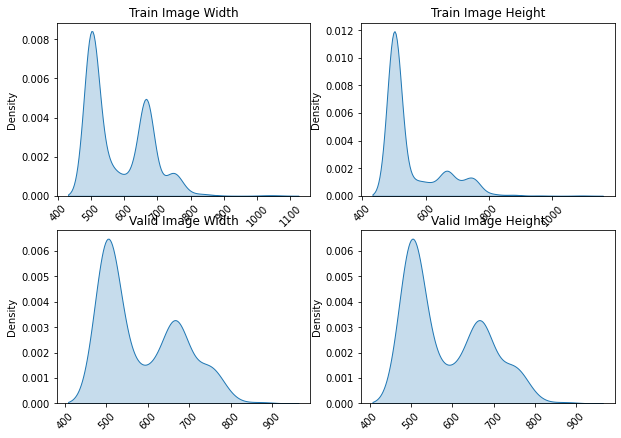

In [6]:
def get_img_size(path='./data/train/'):
    data_list = []
    classes_list = os.listdir(path)
    for i in range(len(classes_list)):
        img_names = os.listdir(path+'/'+classes_list[i])
        for j in range(len(img_names)):
            img_path = path+classes_list[i]+'/'+img_names[j]
            img_size = Image.open(img_path).size
            # print(img_size)
            # print(img_size)
            data_list.append(img_size)
    return data_list
    # return data_dict

train_img_size = get_img_size()
train_img_w = list(map(lambda x:x[0], train_img_size))
train_img_h = list(map(lambda x:x[1], train_img_size))
valid_img_size = get_img_size('./data/test/')
valid_img_w = list(map(lambda x:x[0], valid_img_size))
valid_img_h = list(map(lambda x:x[1], valid_img_size))
plt.figure(figsize=(10, 7))
plt.subplot(2, 2, 1)
sns.kdeplot(train_img_w, shade=True)
plt.xticks(rotation=45)
plt.title('Train Image Width')

plt.subplot(2, 2, 2)
sns.kdeplot(train_img_h, shade=True)
plt.xticks(rotation=45)
plt.title('Train Image Height')

plt.subplot(2, 2, 3)
sns.kdeplot(valid_img_w, shade=True)
plt.xticks(rotation=45)
plt.title('Valid Image Width')

plt.subplot(2, 2, 4)
sns.kdeplot(valid_img_w, shade=True)
plt.xticks(rotation=45)
plt.title('Valid Image Height')

plt.show()